# Close evaluation of layer potentials in three dimensions

## Boundary Integral Equations Research Seminar on November 1, 2019

### Arnold D. Kim

*Department of Applied Mathematics, University of California, Merced*

In [1]:
import  time
print( 'Last updated: %s' %time.strftime('%d/%m/%Y') )

Last updated: 30/10/2019


In [2]:
# defaults for the codes below

import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

## Overview of notebook

This Jupyter notebook contains several codes that are used to generate the results shown in the seminar talk, 
"Close evaluation of layer potentials in three dimensions"

## Numerical integration on the sphere

The codes below demonstrate the accuracy of the product Gaussian quadrature rule introduced by K. Atkinson in the paper entitled, "Numerical integration on the sphere" *J. Austral. Math. Soc. (Series B)* **23**, 332-347 (1982).

For the integral,
\begin{equation}
       I(f) = \int_{0}^{2\pi} \int_{0}^{\pi} f(\theta,\varphi) \sin\theta \mathrm{d}\theta \mathrm{d}\varphi,
\end{equation}
the product Gaussian quadrature rule is given by
\begin{equation}
   I(f) \approx I_{m}(f) = \frac{\pi}{M} \sum_{j = 1}^{2M} \sum_{i = 1}^{M} w_{i} f(\cos^{-1}(z_{i}), \varphi_{j}),
\end{equation}
with $z_{i}$ and $w_{i}$ denoting the $M$-point Gauss-Legendre quadrature points and weights, respectively, and $\varphi_{j} =  \pi (j-1) / M$ denoting the periodic trapezoid rule quadrature rule points.

This quadrature rule is *not* an optimal formula. Nonetheless, its error when $f$ is a $k$-times differentiably smooth function is given by
\begin{equation}
   | I(f) - I_{M}(f) | \le \frac{C}{(2M-1)^{k}}, \quad M \ge 1,
\end{equation}
which shows its *super-algebraic* convergence.

### Example: Surface area of an oblate spheroid

We use the product Gaussian quadrature rule to compute the surface area of an oblate spheroid defined as
\begin{equation}
   y(\theta,\varphi) = ( a \sin\theta \cos\varphi, a \sin\theta \sin\varphi, c \cos\theta )
\end{equation}
with $a \ge c$. We learn in vector calculus that the surface area $S$ for this ellipsoid is given by the integral,
\begin{equation}
   S = \int_{0}^{2\pi} \int_{0}^{\pi} \left| \frac{\partial y}{\partial \theta} \times 
   \frac{\partial y}{\partial \varphi} \right| \mathrm{d}\theta \mathrm{d}\varphi.
\end{equation}
By working out the calculus, we find that
\begin{equation}
       S = \int_{0}^{2\pi} \int_{0}^{\pi}  \frac{a}{\sqrt{2}} \sqrt{ a^2 + c^2 + (a^2 - c^2) \cos 2\theta } \sin\theta \mathrm{d}\theta \mathrm{d}\varphi.
\end{equation}
This integral can be computed analytically and is given by
\begin{equation}
   S = 2 \pi a^{2} + \pi \frac{c^{2}}{e} \log\left( \frac{1 + e}{1 - e} \right),
\end{equation}
where $e^{2} = 1 - c^{2}/a^{2}$.

#### Substitution property

One of the reasons that this quadrature rule works well is that the substitution $z = \cos\theta$ makes the function to be integrated to be more nearly constant. Let
\begin{equation}
   f(\theta,\varphi) = \frac{a}{\sqrt{2}} \sqrt{ a^2 + c^2 + (a^2 - c^2) \cos 2\theta }
\end{equation}
denote the function to be integrated. In the code below, we show that $f(\theta,\varphi) \sin\theta$ is smooth, but $f(\arccos z,\varphi)$ is more nearly constant, which is better for numerical integration.

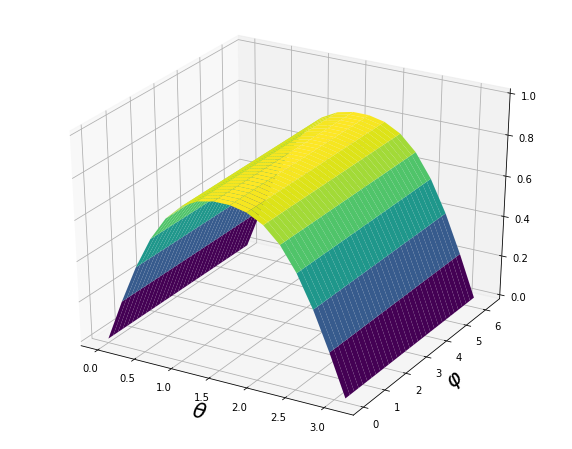

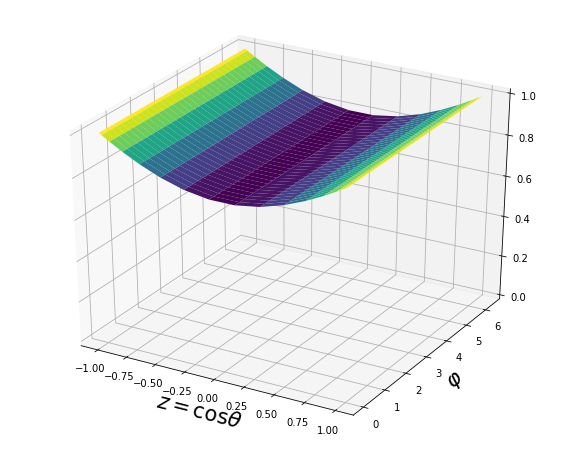

In [4]:
# PLOT THE FUNCTIONS TO COMPARE SMOOTHNESS

# set the principal axes (a >= c)

a = 1.000
c = 0.800

# compute the Gauss-Legendre quadrature rule

θ = np.linspace( 0.0, np.pi, 16 )
φ = np.linspace( 0.0, 2.0 * np.pi, 32 )

# compute a mesh grid

S, T = np.meshgrid( θ, φ )

# compute the functions

f1 = a / np.sqrt( 2.0 ) * np.sqrt( a ** 2 + c ** 2 + ( a ** 2 - c ** 2 ) * np.cos( 2 * S ) ) * np.sin( S )
f2 = a / np.sqrt( 2.0 ) * np.sqrt( a ** 2 + c ** 2 + ( a ** 2 - c ** 2 ) * np.cos( 2 * S ) )

fig1 = plt.figure()
ax1  = plt.axes(projection='3d')
fig2 = plt.figure()
ax2  = plt.axes(projection='3d')

# plot the results

plt.figure(1)
plt.rcParams['figure.figsize'] = [10,8]
ax1.plot_surface( S, T, f1, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax1.set_zlim(0,1)
plt.xlabel( r'$\theta$', fontsize = '21' )
plt.ylabel( r'$\varphi$', fontsize = '21' )

plt.figure(2)
plt.rcParams['figure.figsize'] = [10,8]
ax2.plot_surface( np.cos(S), T, f2, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax2.set_zlim(0,1)
plt.xlabel( r'$z = \cos \theta$', fontsize = '21' )
plt.ylabel( r'$\varphi$', fontsize = '21' )

plt.show()

#### Error computation

In what follows, we use the product Gaussian quadrature rule to compute $I_{M}(f)$ with
\begin{equation}
   f(\theta,\varphi) = \frac{a}{\sqrt{2}} \sqrt{ a^2 + c^2 + (a^2 - c^2) \cos 2\theta },
\end{equation}
and compare that result to the analytical formula.

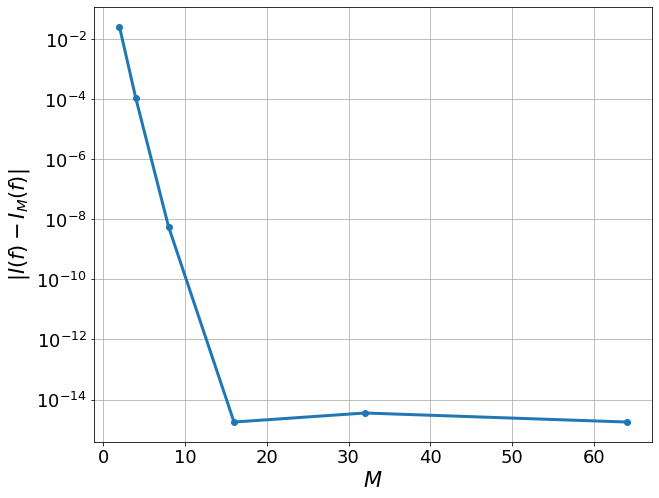

In [5]:
# ---------------------------------------------- #
# COMPUTE THE SURFACE AREA OF AN OBLATE SPHEROID #
# ---------------------------------------------- #

# set the principal axes (a >= c)

a = 1.000
c = 0.800

# compute the analytical surface area
    
e = np.sqrt( 1.0 - c ** 2 / a ** 2 )

Sexact = 2.0 * np.pi * a ** 2 + np.pi * c ** 2 / e * np.log( ( 1.0 + e ) / ( 1.0 - e ) ) 

# set the order of the product Gaussian quadrature rule

M = np.array( [ 2, 4, 8, 16, 32, 64 ] )

# allocate memory for the error

error = np.zeros( ( len(M), 1 ), dtype = 'float' )

# compute the error made by the product Gaussian quadrature rule for different M

for i in range( len(M) ): 

    # compute the Gauss-Legendre quadrature rule

    z, w = np.polynomial.legendre.leggauss( M[i] )

    # compute a meshgrid of θ and φ

    θ, φ = np.meshgrid( np.arccos( z ), np.linspace( 0.0, 2.0 * np.pi, 2 * M[i] ) )

    # create a matrix for the function f(θ,φ)

    f = a / np.sqrt( 2.0 ) * np.sqrt( a ** 2 + c ** 2 + ( a ** 2 - c ** 2 ) * np.cos( 2 * θ ) )

    # integrate the function using the product Gaussian quadrature rule

    Sapprox = np.pi / M[i] * np.sum( w * np.sum( f, axis = 0 ) )

    # compute the error
    
    error[i] = np.abs( Sexact - Sapprox )
    
# PLOT THE ERROR

# set the size of the plots

plt.rcParams['figure.figsize'] = [10,8]

# plot the error versus M 
fig, ax = plt.subplots()
plt.semilogy( M, error, 'o-', linewidth = 3.0 )
plt.xlabel( r'$M$', fontsize = '21' )
plt.ylabel( r'$|I(f) - I_{M}(f)|$', fontsize = '21' )
ax.tick_params(axis='both', which='major', labelsize=18)
plt.grid()
plt.show()

## Poisson's formula

As a case study, we consider the following boundary value problem for Laplace's equation in the sphere of radius $a$,
\begin{gather}
   \varDelta u = 0 \quad \text{in $r < a$},\\
   u = f \quad \text{on $r = a$}.
\end{gather}
The solution is given by Poisson's formula,
\begin{equation}
   u(x) = \frac{1}{4\pi} \int_{|y| = a} \frac{a^{2} - |x|^{2}}{|x - y|^{3}} f(y) \mathrm{d}\sigma_{y}, \quad |x| < a.
\end{equation}
We parameterize $y$ according to
\begin{equation}
  y(s,t) = a ( \sin s \cos t, \sin s \sin t, \cos s ).
\end{equation}
When we substitute $x = r ( \sin\theta \cos\varphi, \sin\theta \sin\varphi, \cos\theta )$ into Poisson's formula, we obtain
\begin{equation}
   u(r,\theta,\varphi) = a \frac{a^{2} - r^{2}}{4\pi} \int_{0}^{2\pi} \int_{0}^{\pi} 
   \frac{f(s,t)}{\left[ a^{2} + r^{2} - 2 a r \left( \cos\theta \cos s + \sin\theta \sin s \cos( \varphi - t ) \right) \right]^{3/2} } \sin s \mathrm{d}s \mathrm{d}t, \quad r < a.
\end{equation}

We seek to evaluate Poisson's formula using the product Gaussian quadrature rule discussed above. To keep things simple, we evaluate only on $\theta = 0$ for $0 \le r < a$. For that case, we have
\begin{equation}
   u(r,0,\cdot) = a \frac{a^{2} - r^{2}}{4\pi} \int_{0}^{2\pi} \int_{0}^{\pi} 
   \frac{f(s,t)}{\left( a^{2} + r^{2} - 2 a r \cos s \right)^{3/2} } \sin s \mathrm{d}s \mathrm{d}t, \quad |r| < a.
\end{equation}
Now, consider the harmonic function
\begin{equation}
   u = ( \cos x + \cos y ) e^{z}.
\end{equation}
When we evaluate this function on $r = a$, we have
\begin{equation}
   f(s,t) = ( \cos( a \sin s \cos t ) + \cos( a \sin s \sin t ) ) e^{a \cos s}.
\end{equation}
Upon substitution of this harmonic function into Poisson's equation evaluated on $\theta = 0$, we obtain
\begin{equation}
   2 e^{r} = a \frac{a^{2} - r^{2}}{4\pi} \int_{0}^{2\pi} \int_{0}^{\pi} 
   \frac{( \cos( a \sin s \cos t ) + \cos( a \sin s \sin t ) ) e^{a \cos s}}{\left( a^{2} + r^{2} - 2 a r \cos s \right)^{3/2} } \sin s \mathrm{d}s \mathrm{d}t, \quad |r| < a.
\end{equation}

### Product Gaussian quadrature rule

The code below computes the numerical approximation to Poisson's formula using the product Gaussian quadrature rule for $0 \le r < a$ and then the plots its error.

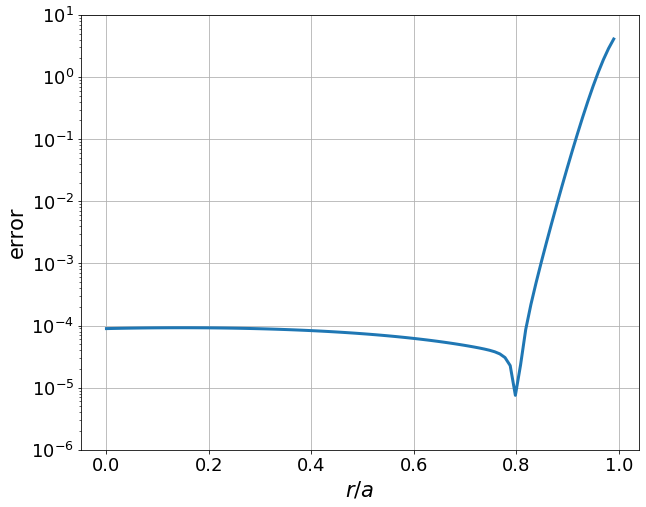

In [9]:
# -------------------------------------------------------------------------------------- #
# COMPUTE POISSON'S FORMULA ALONG THE +Z-AXIS USING THE PRODUCT GAUSSIAN QUADRATURE RULE #
# -------------------------------------------------------------------------------------- #

# set the radius of the sphere

a = 1.00

# compute the z grid

Nz = 100
x3 = np.linspace( 0.0, a, Nz )

# compute the exact value
    
uexact = 2.0 * np.exp( x3 )

# set the order of the product Gaussian quadrature rule

M = 32

# compute the Gauss-Legendre quadrature rule

z, w = np.polynomial.legendre.leggauss( M )

# compute a meshgrid of θ and φ

s, t = np.meshgrid( np.arccos( z ), np.linspace( 0.0, 2.0 * np.pi, 2 * M ) )

# allocate memory for the error

error1 = np.zeros( ( Nz, 1 ), dtype = 'float' )

# compute the error made by the product Gaussian quadrature rule for Poisson's formula

for i in range( Nz ): 

    # create a matrix for the Dirichlet data
    
    y1 = a * np.sin( s ) * np.cos( t )
    y2 = a * np.sin( s ) * np.sin( t )
    y3 = a * np.cos( s )

    f = ( np.cos( y1 ) + np.cos( y2 ) ) * np.exp( y3 )

    # compute the integrand of Poisson's formula
    
    f = a * ( a ** 2 - x3[i] ** 2 ) / ( 4.0 * np.pi ) * f \
        / np.sqrt( a ** 2 + x3[i] ** 2 - 2 * a * x3[i] * np.cos( s ) ) ** 3
    
    # integrate the function using the product Gaussian quadrature rule

    uapprox = np.pi / M * np.sum( w * np.sum( f, axis = 0 ) )
    
    # compute the error
    
    error1[i] = np.abs( uexact[i] - uapprox )
    
# PLOT THE RESULTS

# set the size of the plots

plt.rcParams['figure.figsize'] = [10,8]

# plot the exact solution and the approximation 

fig, ax = plt.subplots()
plt.semilogy( x3[:Nz-1], error1[:Nz-1], linewidth = 3 )
plt.ylim([1e-6, 10])
plt.xlabel( r'$r/a$', fontsize = '21' )
plt.ylabel( r'error', fontsize = '21' )
ax.tick_params(axis='both', which='major', labelsize=18)
plt.grid()
plt.show()

The cause of the large error incurred as $r \to a$ is due to the factor of
\begin{equation}
   K(\cos s;r) = \frac{1}{(a^{2} + r^{2} - 2 a r \cos s)^{3/2}} \sim \frac{1}{(a - r)^{3}} \quad \text{as $s \to 0^{+}$}.
\end{equation}
In the code below, we plot this function for different values of $r$ to show this behavior. Because of the sharp peak that forms on $s = 0$ for $r \sim a$, the function to be integrated is far from nearly constant, and so numerical integration does not work very well.

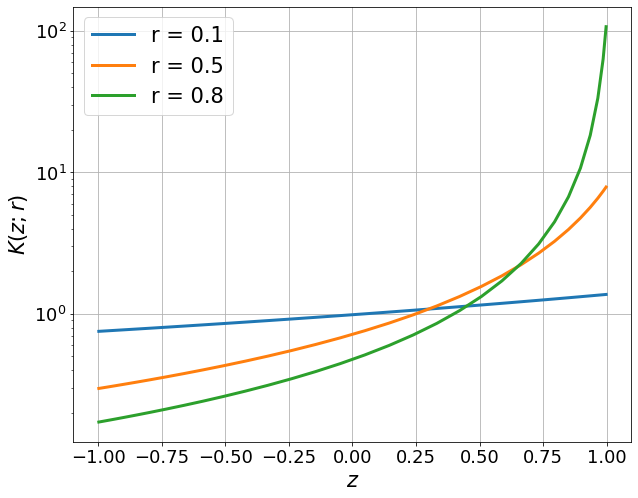

In [10]:
# ------------------------------------------------------ #
# PLOT THE NEARLY-SINGULAR BEHAVIOR OF POISSON'S FORMULA #
# ------------------------------------------------------ #

# set the order of the product Gaussian quadrature rule

M = 32

# compute the Gauss-Legendre quadrature rule

z, w = np.polynomial.legendre.leggauss( M )

# set the value of r

r1 = 0.1
r2 = 0.5
r3 = 0.8

# compute K(z;r)

K1 = 1.0 / np.sqrt( 1 + r1 ** 2 - 2 * r1 * z ) ** 3
K2 = 1.0 / np.sqrt( 1 + r2 ** 2 - 2 * r2 * z ) ** 3
K3 = 1.0 / np.sqrt( 1 + r3 ** 2 - 2 * r3 * z ) ** 3

# plot the results

fig, ax = plt.subplots()
plt.semilogy( z, K1, z, K2, z, K3, linewidth = 3 )
plt.xlabel( r'$z$', fontsize = '21' )
plt.ylabel( r'$K(z;r)$', fontsize = '21' )
ax.tick_params(axis='both', which='major', labelsize=18)
plt.legend( ( 'r = 0.1', 'r = 0.5', 'r = 0.8' ), fontsize = 21 )
plt.grid()
plt.show()

## Modified product Gaussian quadrature rule

Consider instead the function
\begin{equation}
   \tilde{K}(s;r) = \frac{\sin s}{\left( a^{2} + r^{2} - 2 a r \cos s \right)^{3/2} }.
\end{equation}
Because of the factor of $\sin s$, we find that $\tilde{K} \to 0$ as $s \to 0$. For this reason, it seems better to integrate with respect to $s$ instead of making the substitution $z = \cos s$. Therefore, we map the Gauss-Legendre quadrature rule from $[-1,1]$ to $[0,\pi]$ and obtain the following modified product Gaussian quadrature rule,
\begin{equation}
   \tilde{I}_{M}(f) = \frac{\pi}{M} \sum_{j = 1}^{2M} \sum_{i = 1}^{M} \frac{\pi w_{i}}{2} 
   f\left( \frac{\pi (z_{i} + 1)}{2}, \varphi \right) \sin\left( \frac{\pi (z_{i} + 1)}{2} \right).
\end{equation}
In the code below, we implement this modified product Gaussian quadrature rule for Poisson's formula.

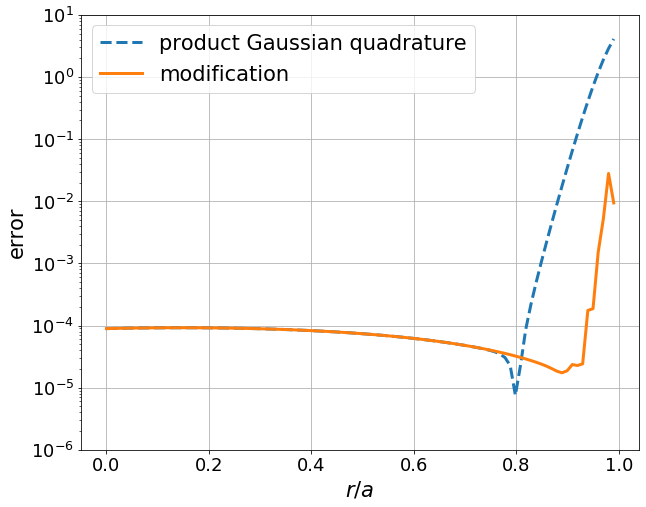

In [11]:
# ----------------------------------------------------------------------------------------------- #
# COMPUTE POISSON'S FORMULA ALONG THE +Z-AXIS USING THE MODIFIED PRODUCT GAUSSIAN QUADRATURE RULE #
# ----------------------------------------------------------------------------------------------- #

# set the radius of the sphere

a = 1.00

# compute the z grid

Nz = 100
x3 = np.linspace( 0.0, a, Nz )

# compute the exact value
    
uexact = 2.0 * np.exp( x3 )

# set the order of the product Gaussian quadrature rule

M = 32

# compute the Gauss-Legendre quadrature rule

z, w = np.polynomial.legendre.leggauss( M )

# compute a meshgrid of θ and φ

s, t = np.meshgrid( np.pi * ( z + 1 ) / 2.0, np.linspace( 0.0, 2.0 * np.pi, 2 * M ) )

# allocate memory for the error

error2 = np.zeros( ( Nz, 1 ), dtype = 'float' )

# compute the error made by the product Gaussian quadrature rule for Poisson's formula

for i in range( Nz ): 

    # create a matrix for the Dirichlet data
    
    y1 = a * np.sin( s ) * np.cos( t )
    y2 = a * np.sin( s ) * np.sin( t )
    y3 = a * np.cos( s )

    f = ( np.cos( y1 ) + np.cos( y2 ) ) * np.exp( y3 )

    # compute the integrand of Poisson's formula
    
    f = a * ( a ** 2 - x3[i] ** 2 ) / ( 4.0 * np.pi ) * f \
        / np.sqrt( a ** 2 + x3[i] ** 2 - 2 * a * x3[i] * np.cos( s ) ) ** 3 * np.sin( s )
    
    # integrate the function using the product Gaussian quadrature rule

    uapprox = np.pi / M * np.sum( 0.5 * np.pi * w * np.sum( f, axis = 0 ) )
    
    # compute the error
    
    error2[i] = np.abs( uexact[i] - uapprox )
    
# PLOT THE RESULTS

# set the size of the plots

plt.rcParams['figure.figsize'] = [10,8]

# plot the exact solution and the approximation 

fig, ax = plt.subplots()
plt.semilogy( x3[:Nz-1], error1[:Nz-1], '--', x3[:Nz-1], error2[:Nz-1], '-', linewidth = 3.0 )
plt.ylim([1e-6, 10])
plt.xlabel( r'$r/a$', fontsize = '21' )
plt.ylabel( r'error', fontsize = '21' )
ax.tick_params(axis='both', which='major', labelsize=18)
plt.legend( ( 'product Gaussian quadrature', 'modification' ), fontsize = 21 )
plt.grid()
plt.show()

## Subtraction method

The modified product Gaussian quadrature rule helps to improve the computation of Poisson's formula due to the factor of $\sin s$ which vanishes as $s \to 0$. If we could find another way to drive the function to be integrated to zero faster as $s \to 0$ that would help improve the computation even more.

Considering that $u = 1$ is a harmonic function with $f = 1$ on $r = a$, we substitute these into Poisson's formula and obtain the identity,
\begin{equation}
   1 = a \frac{a^{2} - r^{2}}{4\pi} \int_{0}^{2\pi} \int_{0}^{\pi} 
   \frac{1}{\left[ a^{2} + r^{2} - 2 a r \left( \cos\theta \cos s + \sin\theta \sin s \cos( \varphi - t ) \right) \right]^{3/2} } \sin s \mathrm{d}s \mathrm{d}t, \quad r < a.
\end{equation}
Using this identity, we rewrite Poisson's formula according to
\begin{equation}
   u(r,0,\cdot) = u(a,0,\cdot) + a \frac{a^{2} - r^{2}}{4\pi} \int_{0}^{2\pi} \int_{0}^{\pi} 
   \frac{[f(s,t) - f(0,\cdot)] \sin s}{\left( a^{2} + r^{2} - 2 a r \cos s \right)^{3/2} } \mathrm{d}s \mathrm{d}t, 
   \quad |r| < a.
\end{equation}
Because $[f(s,t) - f(0,\cdot)] \sin s \ll \sin s$ as $s \to 0$, this subtraction method will improve the computation of Poisson's formula.

For the example we have been using, we find that
\begin{equation}
   [ f(s,t) - f(0,\cdot) ] = O(s^{2}), \quad s \to 0.
\end{equation}
In the code below, we plot
\begin{equation}
   \tilde{K}(s;r) = \frac{\sin s}{\left( a^{2} + r^{2} - 2 a r \cos s \right)^{3/2} }.
\end{equation}
and $s^{2} \tilde{K}(s;r)$ to see the effect of the subtraction method on the function to be integrated.

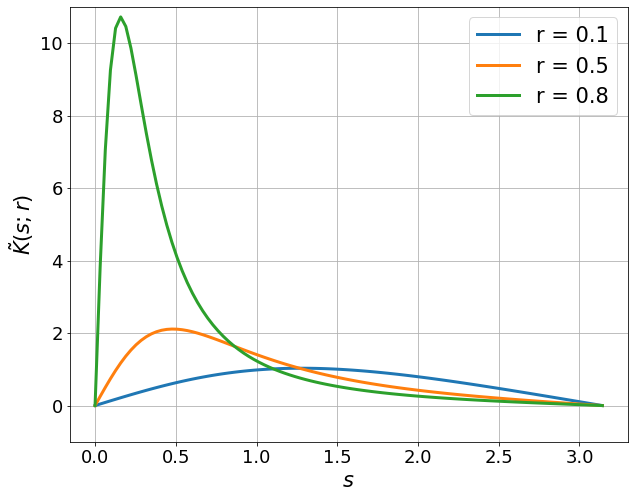

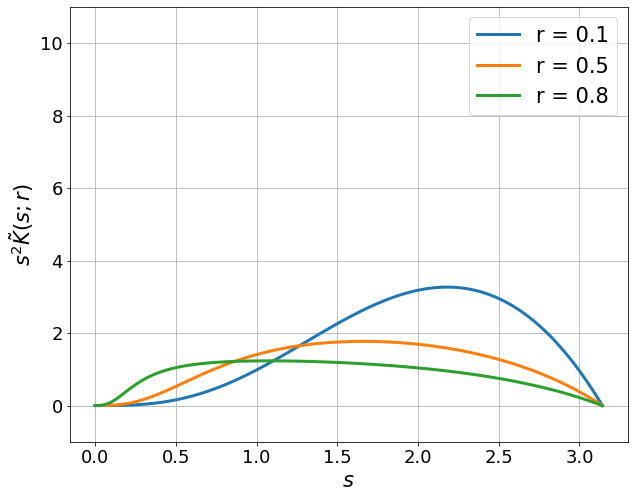

In [47]:
# --------------------------------------------------------------- #
# PLOT THE IMPROVED NEARLY-SINGULAR BEHAVIOR OF POISSON'S FORMULA #
# --------------------------------------------------------------- #

# set the order of the product Gaussian quadrature rule

M = 100

# compute the Gauss-Legendre quadrature rule

θ = np.linspace( 0.0, np.pi, M )

# set the value of r

r1 = 0.1
r2 = 0.5
r3 = 0.8

# compute K(z;r)

K1 = np.sin( θ ) / np.sqrt( 1 + r1 ** 2 - 2 * r1 * np.cos( θ ) ) ** 3
K2 = np.sin( θ ) / np.sqrt( 1 + r2 ** 2 - 2 * r2 * np.cos( θ ) ) ** 3
K3 = np.sin( θ ) / np.sqrt( 1 + r3 ** 2 - 2 * r3 * np.cos( θ ) ) ** 3

# plot the results

fig, ax = plt.subplots()
plt.figure(1)
plt.plot( θ, K1, θ, K2, θ, K3, linewidth = 3 )
plt.xlabel( r'$s$', fontsize = '21' )
plt.ylabel( r'$\tilde{K}(s;r)$', fontsize = '21' )
plt.ylim(-1,11)
ax.tick_params(axis='both', which='major', labelsize=18)
plt.legend( ( 'r = 0.1', 'r = 0.5', 'r = 0.8' ), fontsize = 21 )
plt.grid()

fig, ax = plt.subplots()
plt.figure(2)
plt.plot( θ, θ ** 2 * K1, θ, θ ** 2 * K2, θ, θ ** 2 * K3, linewidth = 3 )
plt.xlabel( r'$s$', fontsize = '21' )
plt.ylabel( r'$s^{2} \tilde{K}(s;r)$', fontsize = '21' )
plt.ylim(-1,11)
ax.tick_params(axis='both', which='major', labelsize=18)
plt.legend( ( 'r = 0.1', 'r = 0.5', 'r = 0.8' ), fontsize = 21 )
plt.grid()

plt.show()

### Subtraction method with product Gaussian quadrature

We apply this subtraction method and use the product Gaussian quadrature rule code below.

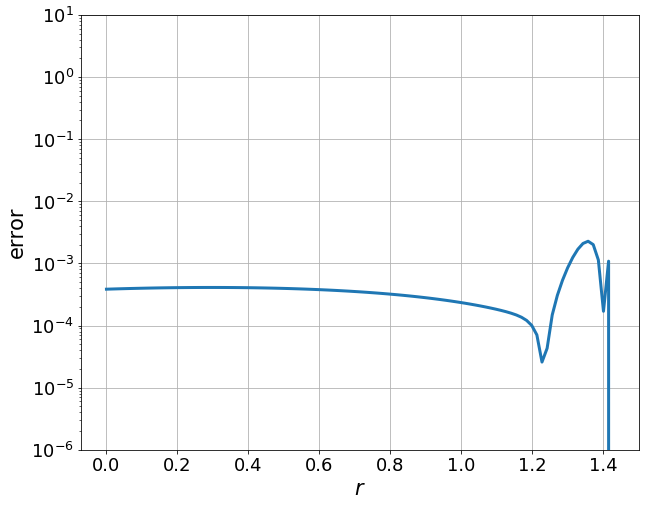

In [13]:
# -------------------------------------------------------------------------------------------------------- #
# COMPUTE POISSON'S FORMULA ALONG THE +Z-AXIS USING THE SUBTRACTION METHOD AND PRODUCT GAUSSIAN QUADRATURE #
# -------------------------------------------------------------------------------------------------------- #

# set the radius of the sphere

a = 1.4300

# compute the z grid

Nz = 100
x3 = np.linspace( 0.0, a, Nz )

# compute the exact value
    
uexact = 2.0 * np.exp( x3 )

# compute the exact value on the boundary

ubdy = 2.0 * np.exp( a )

# set the order of the product Gaussian quadrature rule

M = 32

# compute the Gauss-Legendre quadrature rule

z, w = np.polynomial.legendre.leggauss( M )

# compute a meshgrid of θ and φ

s, t = np.meshgrid( np.arccos( z ), np.linspace( 0.0, 2.0 * np.pi, 2 * M ) )

# allocate memory for the error

error3 = np.zeros( ( Nz, 1 ), dtype = 'float' )

# compute the error made by the product Gaussian quadrature rule for Poisson's formula

for i in range( Nz ): 

    # create a matrix for f(s,t) - f(0,.)
    
    y1 = a * np.sin( s ) * np.cos( t )
    y2 = a * np.sin( s ) * np.sin( t )
    y3 = a * np.cos( s )

    f = ( np.cos( y1 ) + np.cos( y2 ) ) * np.exp( y3 ) - ubdy

    # compute the integrand of Poisson's formula
    
    f = a * ( a ** 2 - x3[i] ** 2 ) / ( 4.0 * np.pi ) * f \
        / np.sqrt( a ** 2 + x3[i] ** 2 - 2 * a * x3[i] * np.cos( s ) ) ** 3
    
    # integrate the function using the product Gaussian quadrature rule

    uapprox = ubdy + np.pi / M * np.sum( w * np.sum( f, axis = 0 ) )
    
    # compute the error
    
    error3[i] = np.abs( uexact[i] - uapprox )
    
# PLOT THE RESULTS

# set the size of the plots

plt.rcParams['figure.figsize'] = [10,8]

# plot the exact solution and the approximation 

fig, ax = plt.subplots()
plt.semilogy( x3, error3, linewidth = 3.0 )
plt.ylim([1e-6, 10])
plt.xlabel( r'$r$', fontsize = '21' )
plt.ylabel( r'error', fontsize = '21' )
ax.tick_params(axis='both', which='major', labelsize=18)
plt.grid()
plt.show()

### Subtraction method with the modified Gaussian product quadrature rule

Next, we apply this subtraction method and use the modified product Gaussian quadrature rule in the code below. We compare the result from above using the product Gaussian quadrature rule for reference.

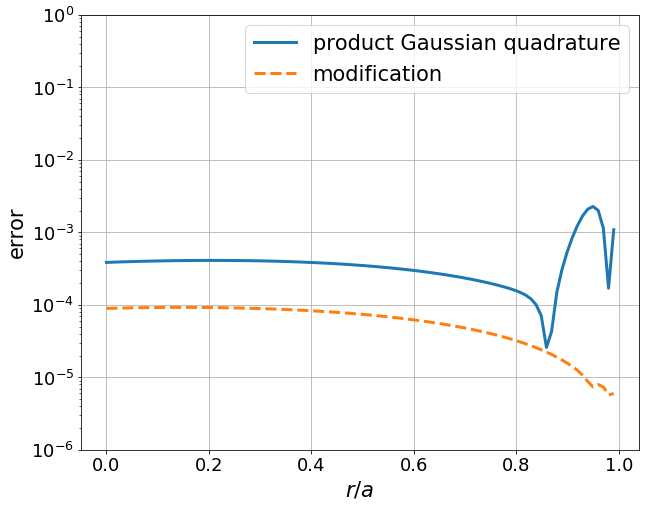

In [30]:
# ----------------------------------------------------------------------------------------------------------------- #
# COMPUTE POISSON'S FORMULA ALONG THE +Z-AXIS USING THE SUBTRACTION METHOD AND MODIFIED PRODUCT GAUSSIAN QUADRATURE #
# ----------------------------------------------------------------------------------------------------------------- #

# set the radius of the sphere

a = 1.00

# compute the z grid

Nz = 100
x3 = np.linspace( 0.0, a, Nz )

# compute the exact value
    
uexact = 2.0 * np.exp( x3 )

# compute the exact value on the boundary

ubdy = 2.0 * np.exp( a )

# set the order of the product Gaussian quadrature rule

M = 32

# compute the Gauss-Legendre quadrature rule

z, w = np.polynomial.legendre.leggauss( M )

# compute a meshgrid of θ and φ

s, t = np.meshgrid( np.pi * ( z + 1.0 ) / 2.0, np.linspace( 0.0, 2.0 * np.pi, 2 * M ) )

# allocate memory for the error

error4 = np.zeros( ( Nz, 1 ), dtype = 'float' )

# compute the error made by the product Gaussian quadrature rule for Poisson's formula

for i in range( Nz ): 

    # create a matrix for f(s,t) - f(0,.)
    
    y1 = a * np.sin( s ) * np.cos( t )
    y2 = a * np.sin( s ) * np.sin( t )
    y3 = a * np.cos( s )

    f = ( np.cos( y1 ) + np.cos( y2 ) ) * np.exp( y3 ) - ubdy

    # compute the integrand of Poisson's formula
    
    f = a * ( a ** 2 - x3[i] ** 2 ) / ( 4.0 * np.pi ) * f \
        / np.sqrt( a ** 2 + x3[i] ** 2 - 2 * a * x3[i] * np.cos( s ) ) ** 3 \
        * np.sin( s )
    
    # integrate the function using the product Gaussian quadrature rule

    uapprox = ubdy + np.pi / M * np.sum( 0.5 * np.pi * w * np.sum( f, axis = 0 ) )
    
    # compute the error
    
    error4[i] = np.abs( uexact[i] - uapprox )
    
# PLOT THE RESULTS

# set the size of the plots

plt.rcParams['figure.figsize'] = [10,8]

# plot the exact solution and the approximation 

fig, ax = plt.subplots()
plt.semilogy( x3[:Nz-1], error3[:Nz-1], '-', x3[:Nz-1], error4[:Nz-1], '--', linewidth = 3.0 )
plt.ylim([1e-6, 1])
plt.xlabel( r'$r/a$', fontsize = '21' )
plt.ylabel( r'error', fontsize = '21' )
ax.tick_params(axis='both', which='major', labelsize=18)
plt.legend( ( 'product Gaussian quadrature', 'modification' ), fontsize = 21 )
plt.grid()
plt.show()